In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv('/content/customer_purchase_data.csv')

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,Female,66120.26794,8,Electronics,30.568601,0,5,1
1,20,Female,23579.77358,4,Home Goods,38.240097,0,5,0
2,27,Female,127821.30640,11,Home Goods,31.633212,1,0,1
3,24,Female,137798.62310,19,Beauty,46.167059,0,4,1
4,31,Female,99300.96422,19,Clothing,19.823592,0,0,1


In [4]:
df.shape

(1500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   object 
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   object 
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 105.6+ KB


In [6]:
df.describe()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,84249.164339,10.420000,30.469040,0.326667,2.555333,0.43200
std,15.537259,37629.493078,5.887391,16.984392,0.469151,1.705152,0.49552
min,18.000000,20001.512520,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,53028.979155,5.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,83699.581475,11.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,117167.772900,15.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,149785.176500,20.000000,59.991105,1.000000,5.000000,1.00000


In [7]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


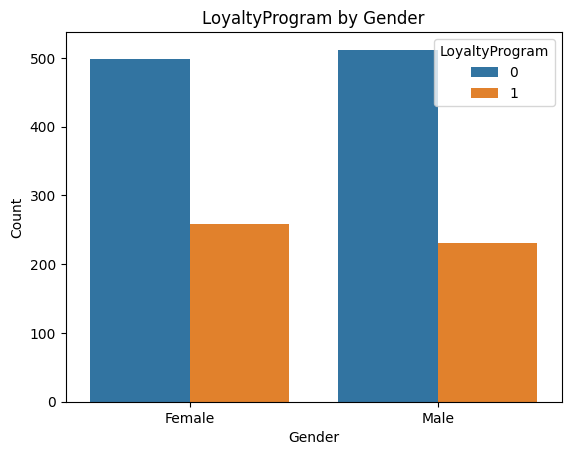

In [9]:
sns.countplot(data=df, x='Gender', hue='LoyaltyProgram')
plt.title('LoyaltyProgram by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='LoyaltyProgram')
plt.show()

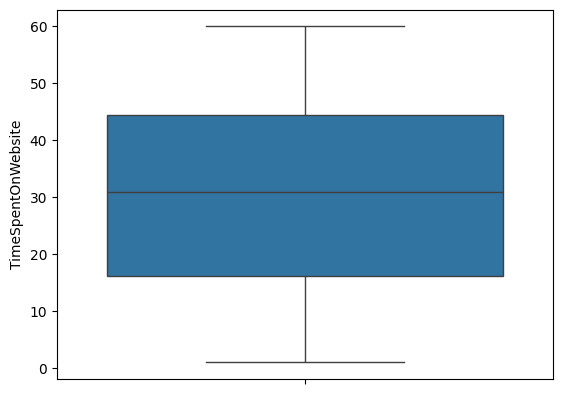

In [10]:
plt.figure()
sns.boxplot(df['TimeSpentOnWebsite'])
plt.show()

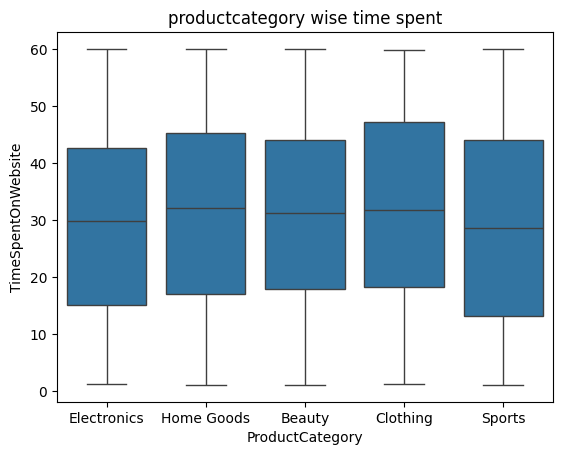

In [11]:
sns.boxplot(data=df, x='ProductCategory', y='TimeSpentOnWebsite')
plt.title('productcategory wise time spent')
plt.show()

In [12]:
# Columns to encode
cat_cols = ['Gender','ProductCategory']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [14]:
print(df.head())

   Age  Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       0   66120.26794                  8                2   
1   20       0   23579.77358                  4                3   
2   27       0  127821.30640                 11                3   
3   24       0  137798.62310                 19                0   
4   31       0   99300.96422                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  


In [15]:
# Columns to scale
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'LoyaltyProgram','DiscountsAvailed']

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save back to the same CSV file
df.to_csv('customer_purchase.csv', index=False)

In [16]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,-0.276761,0,-0.481934,-0.411185,2,0.005864,-0.696526,1.434172,1
1,-1.564418,0,-1.612821,-1.090830,3,0.457694,-0.696526,1.434172,0
2,-1.113738,0,1.158311,0.098548,3,0.068566,1.435697,-1.499095,1
3,-1.306887,0,1.423546,1.457838,0,0.924570,-0.696526,0.847519,1
4,-0.856207,0,0.400133,1.457838,1,-0.626987,-0.696526,-1.499095,1


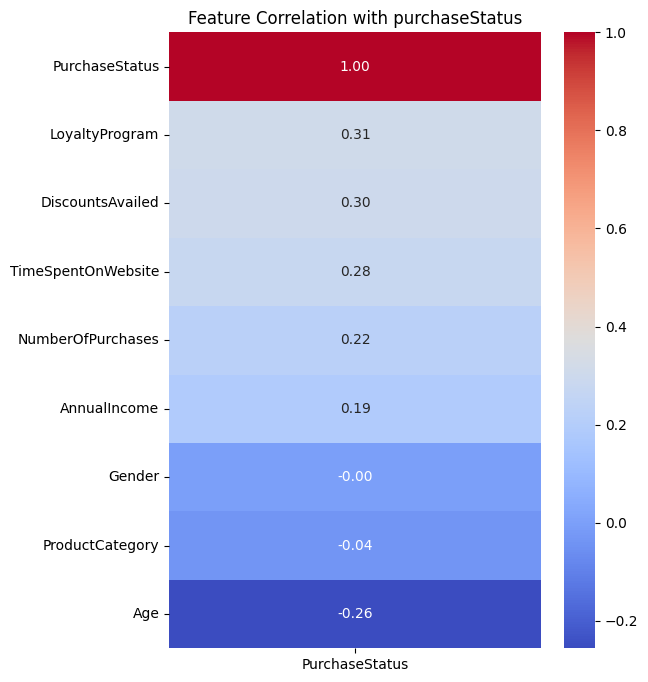

In [17]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with the target variable
target_corr = corr_matrix[['PurchaseStatus']].sort_values(by='PurchaseStatus', ascending=False)

# Plot heatmap
plt.figure(figsize=(6,8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with purchaseStatus')
plt.show()

In [18]:
# Separate features and target
X = df.drop(['PurchaseStatus'], axis=1) # Pass columns to drop as a list
y = df['PurchaseStatus']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
# Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict
y_pred = model_lr.predict(X_test)

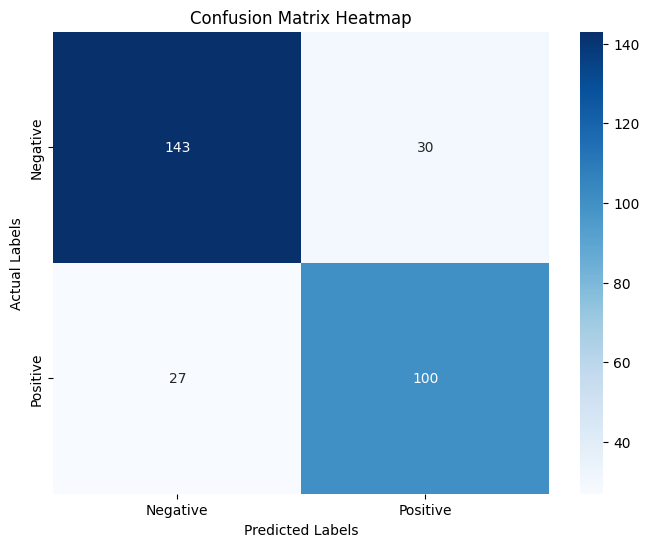

In [21]:
# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       173
           1       0.77      0.79      0.78       127

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [23]:
accuracy_lr=accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy_lr)

Accuracy Score: 0.81


In [24]:
# Fit the Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Predict
y_pred = model_dt.predict(X_test)

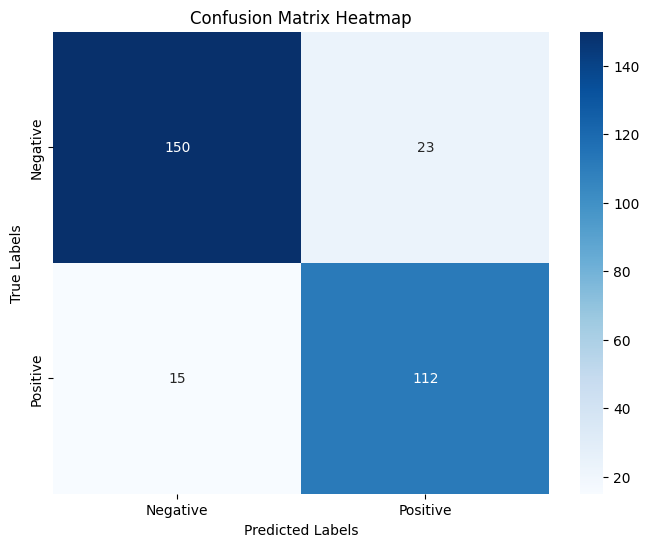

In [26]:
# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       173
           1       0.83      0.88      0.85       127

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



In [28]:
accuracy_dt=accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy_dt)

Accuracy Score: 0.8733333333333333


In [29]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predict
y_pred = model_rf.predict(X_test)

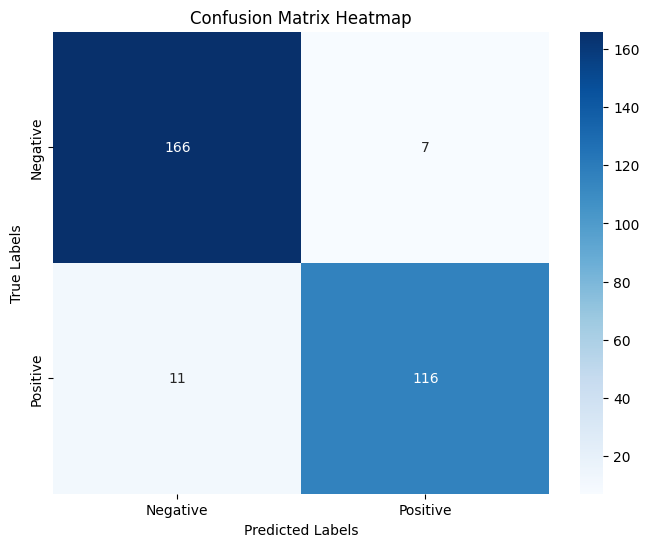

In [30]:
# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

In [31]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       173
           1       0.94      0.91      0.93       127

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [32]:
accuracy_rf=accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy_rf)

Accuracy Score: 0.94


In [33]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

# Predict
y_pred = model_svc.predict(X_test)

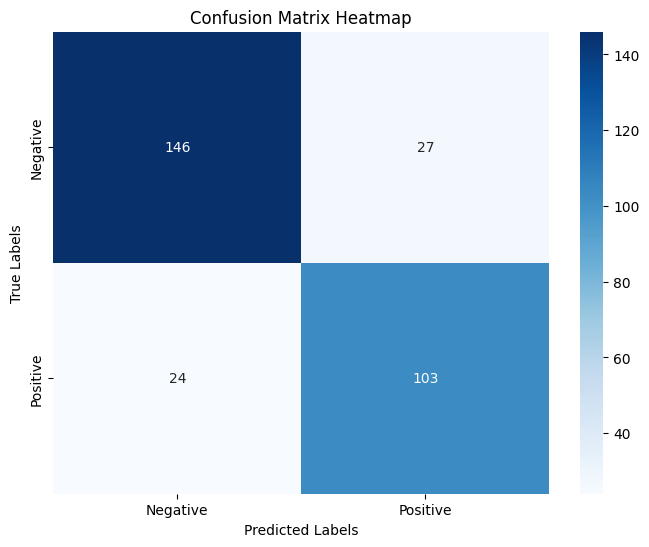

In [34]:
# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

In [35]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       173
           1       0.79      0.81      0.80       127

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [36]:
accuracy_SVC=accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy_SVC)

Accuracy Score: 0.83


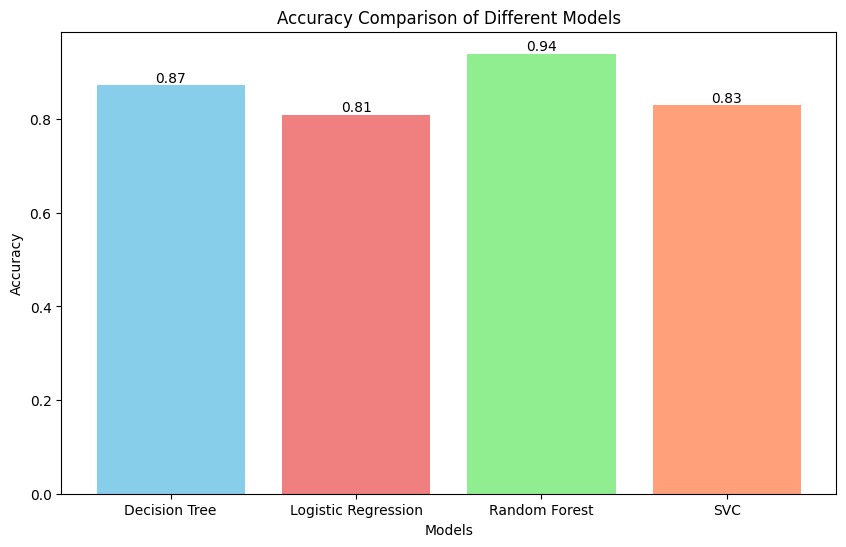

In [37]:
import matplotlib.pyplot as plt

# Data for the bar graph
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVC']
accuracies = [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_SVC]

# Creating the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])

# Add accuracy values on top of the bars
plt.bar_label(bars, labels=[str(round(v, 2)) for v in accuracies])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")

plt.show()

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=3,random_state=1)

X_train_pc= pca.fit_transform(X_train)
X_test_pc= pca.fit_transform(X_test)

In [40]:
model_pc = LogisticRegression(random_state=1)
model_pc.fit(X_train_pc,y_train)

LogisticRegression(random_state=1)

In [41]:
y_pred=model_pc.predict(X_test_pc)

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       187
           1       0.48      0.54      0.51       113

    accuracy                           0.61       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.62      0.61      0.61       300



In [43]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [47]:
%%writefile Abc.py.py

Writing Abc.py.py


In [48]:
! wget -q -O - ipv4.icanhazip.com

104.199.220.252


In [49]:
! streamlit run Abc.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.220.252:8501

⠧⠇y
104.199.220.252
your url is: https://sharp-bats-grab.loca.lt
  Stopping...
^C
